#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [22]:
!nvidia-smi

Tue Sep 30 14:43:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P0             29W /   70W |    1598MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# ---------------------------------------------------------
# Install YOLOv11 via Ultralytics pip package
# ---------------------------------------------------------
!pip install ultralytics --upgrade -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.0 MB/s eta 0:00:00


In [3]:
# ---------------------------------------------------------
# Verify PyTorch and GPU availability
# ---------------------------------------------------------
import torch
from ultralytics import YOLO

print(f"Setup complete. Using torch {torch.__version__}")
print("GPU available:", torch.cuda.is_available())

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Setup complete. Using torch 2.8.0+cu126
GPU available: True


# Custom Data Preparation

In [4]:
# ---------------------------------------------------------
# Install gdown and download ZIP from Google Drive
# ---------------------------------------------------------
!pip install gdown -q

import gdown

# Replace with your actual Google Drive shareable link
url = "https://drive.google.com/file/d/1VJ8fl31MvTpDvA8w9TScMCmuhiwr_ozq/view?usp=sharing"

# Extract file ID and construct direct download link
file_id      = url.split("/")[-2]
download_url = f"https://drive.google.com/uc?id={file_id}"

# Download the ZIP file
gdown.download(download_url, output="Sign_Language_Images.zip", quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1VJ8fl31MvTpDvA8w9TScMCmuhiwr_ozq
From (redirected): https://drive.google.com/uc?id=1VJ8fl31MvTpDvA8w9TScMCmuhiwr_ozq&confirm=t&uuid=18789196-ec8c-4037-b62d-f41b51d02fc8
To: /content/Sign_Language_Images.zip
100%|██████████| 109M/109M [00:03<00:00, 29.2MB/s]


'Sign_Language_Images.zip'

In [5]:
# ---------------------------------------------------------
# Unzip dataset and remove archive for cleanliness
# ---------------------------------------------------------
!unzip -q Sign_Language_Images.zip
!rm Sign_Language_Images.zip

In [6]:
# ---------------------------------------------------------
# Load and verify class mappings and dataset structure
# ---------------------------------------------------------
import yaml

with open("Sign_Language_Images/data.yaml", "r") as f:
    data_yaml = yaml.safe_load(f)

print("Classes           :", data_yaml["names"])
print("Number of classes :", data_yaml["nc"])

Classes           : ['hello', 'iloveyou', 'no', 'okay', 'sorry', 'thanks', 'yes']
Number of classes : 7


# Train Custom YOLOv11 Detector

In [7]:
# ---------------------------------------------------------
# Train YOLOv11 using Ultralytics API
# ---------------------------------------------------------
from ultralytics import YOLO

model = YOLO("yolov8s.pt")  # YOLOv11s baseline

model.train(
              data   = "Sign_Language_Images/data.yaml",
              epochs = 50,
              imgsz  = 416,
              batch  = 16,
              name   = "yolov11_sign_language",
              cache  = True
           )

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Sign_Language_Images/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11_sign_language, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, p

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x788785ac4200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

# Evaluate Custom YOLOv5 Detector Performance

In [15]:
results = model.val()
print("mAP50:", results.box.map50)
print("mAP:", results.box.map)

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,128,293 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 13.8±8.3 MB/s, size: 23.2 KB)
val: Scanning /content/Sign_Language_Images/valid/labels.cache... 373 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 373/373 659.3Kit/s 0.0s
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.
val: Caching images (0.2GB RAM): 100% ━━━━━━━━━━━━ 373/373 258.4it/s 1.4s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 24/24 7.0it/s 3.4s
                   all        373        373          1          1      0.995      0.973
                 hello         60         60          1          1      0.995      0.874
              iloveyou         50         50          1          1      0.995  

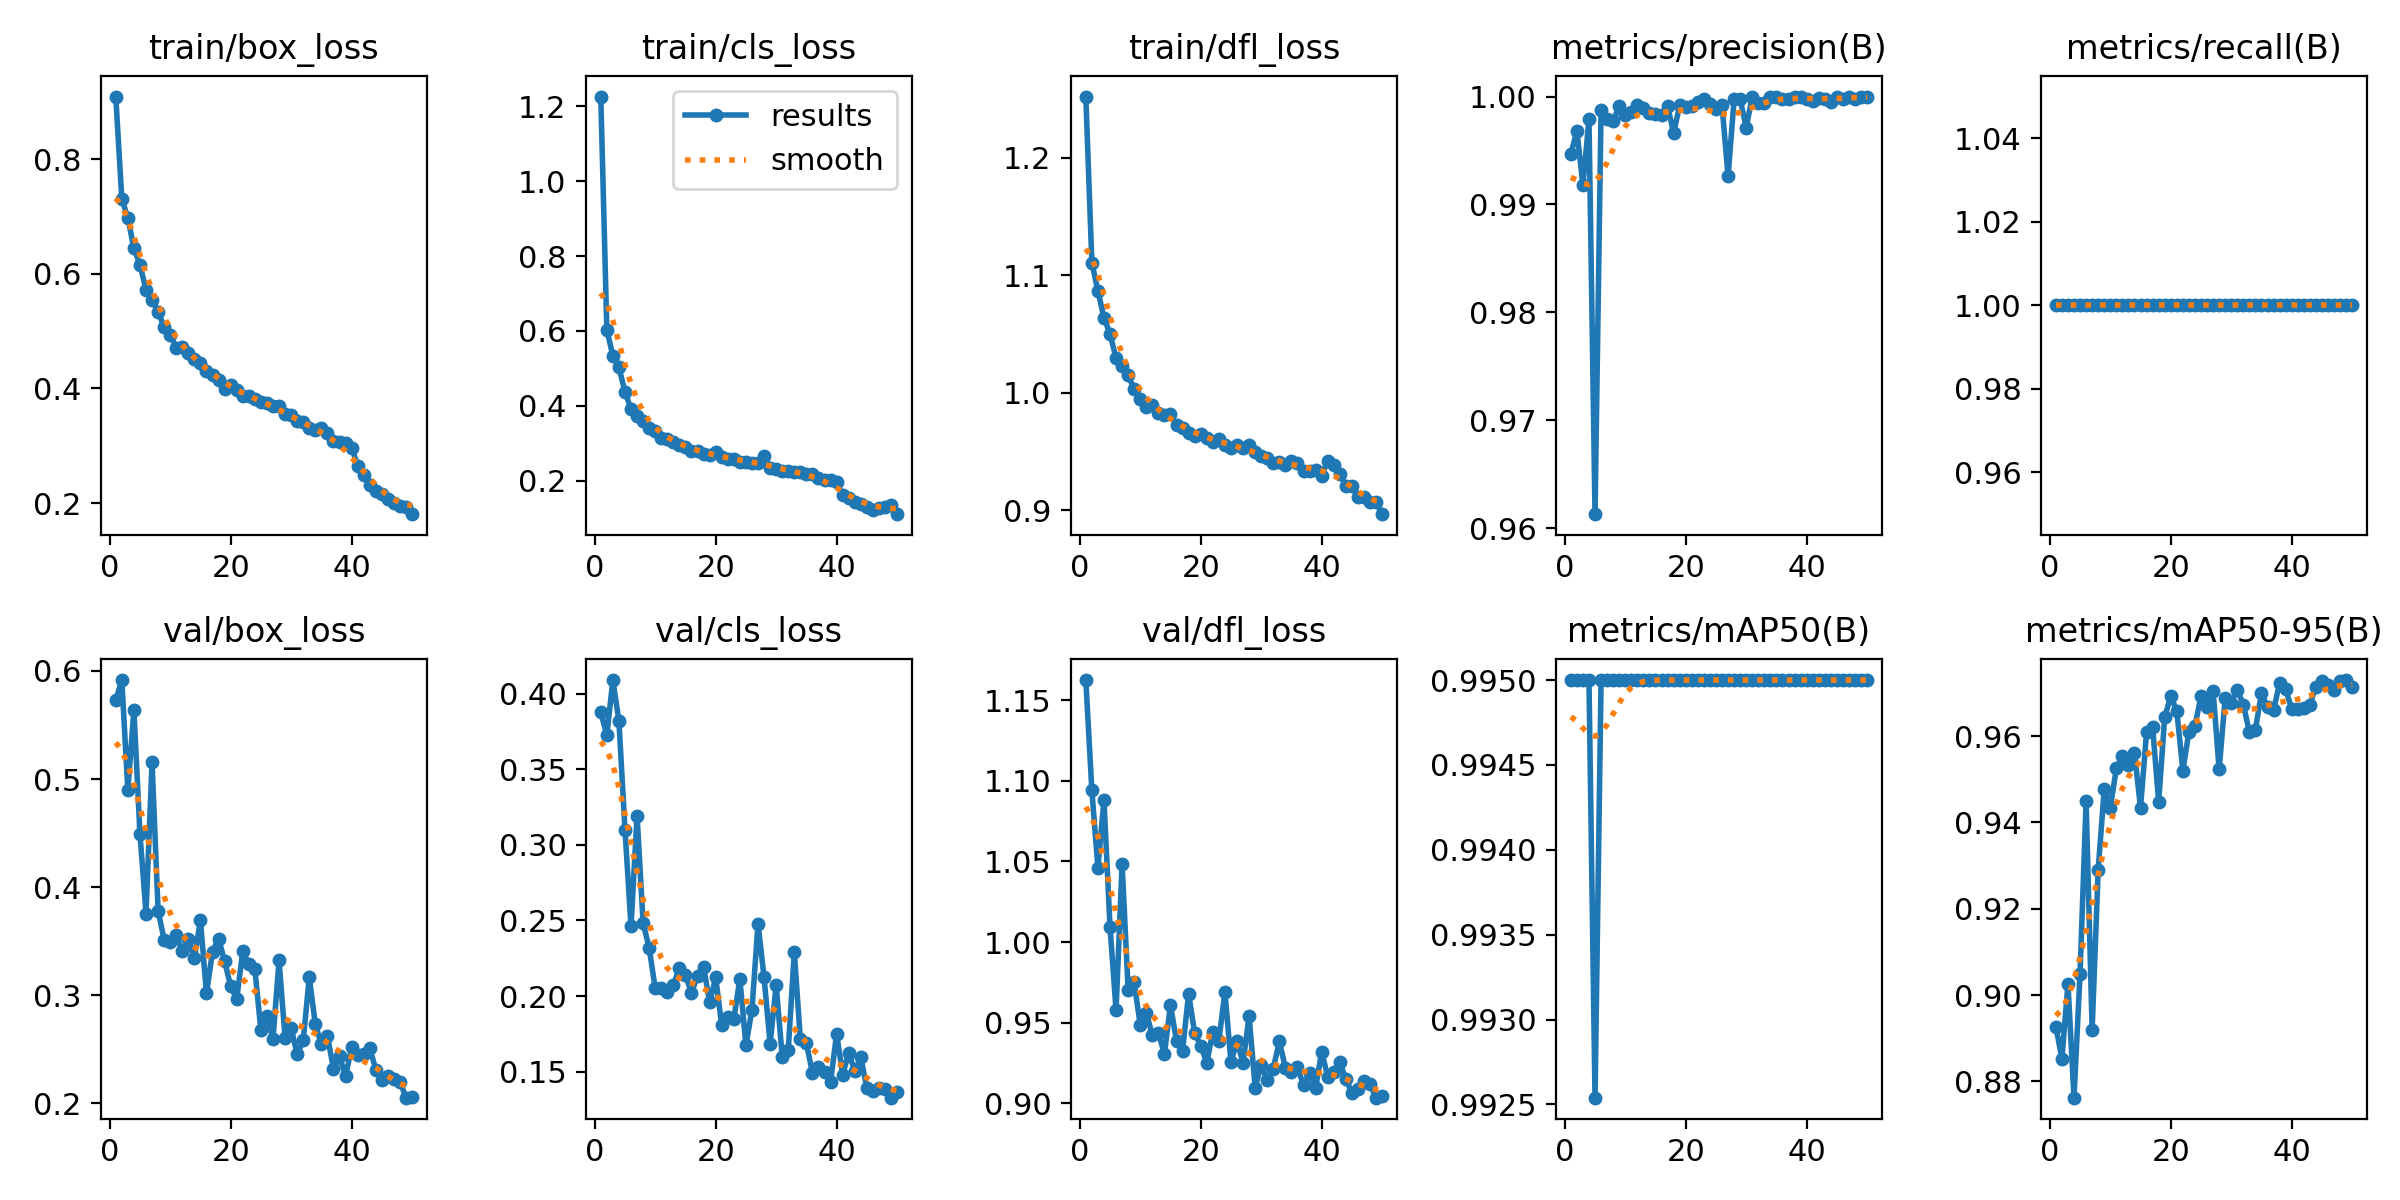

In [16]:
# ---------------------------------------------------------
# Plot training metrics from results.csv as results.png
# Useful fallback if TensorBoard isn't rendering
# ---------------------------------------------------------
from ultralytics.utils.plotting import plot_results
from IPython.display            import Image

# Path to your training run directory
run_path = "runs/detect/yolov11_sign_language"

# Generate results.png from results.csv
plot_results(file=f"{run_path}/results.csv")

# Display the image inline
Image(filename=f"{run_path}/results.png", width=1000)

GROUND TRUTH TRAINING DATA:


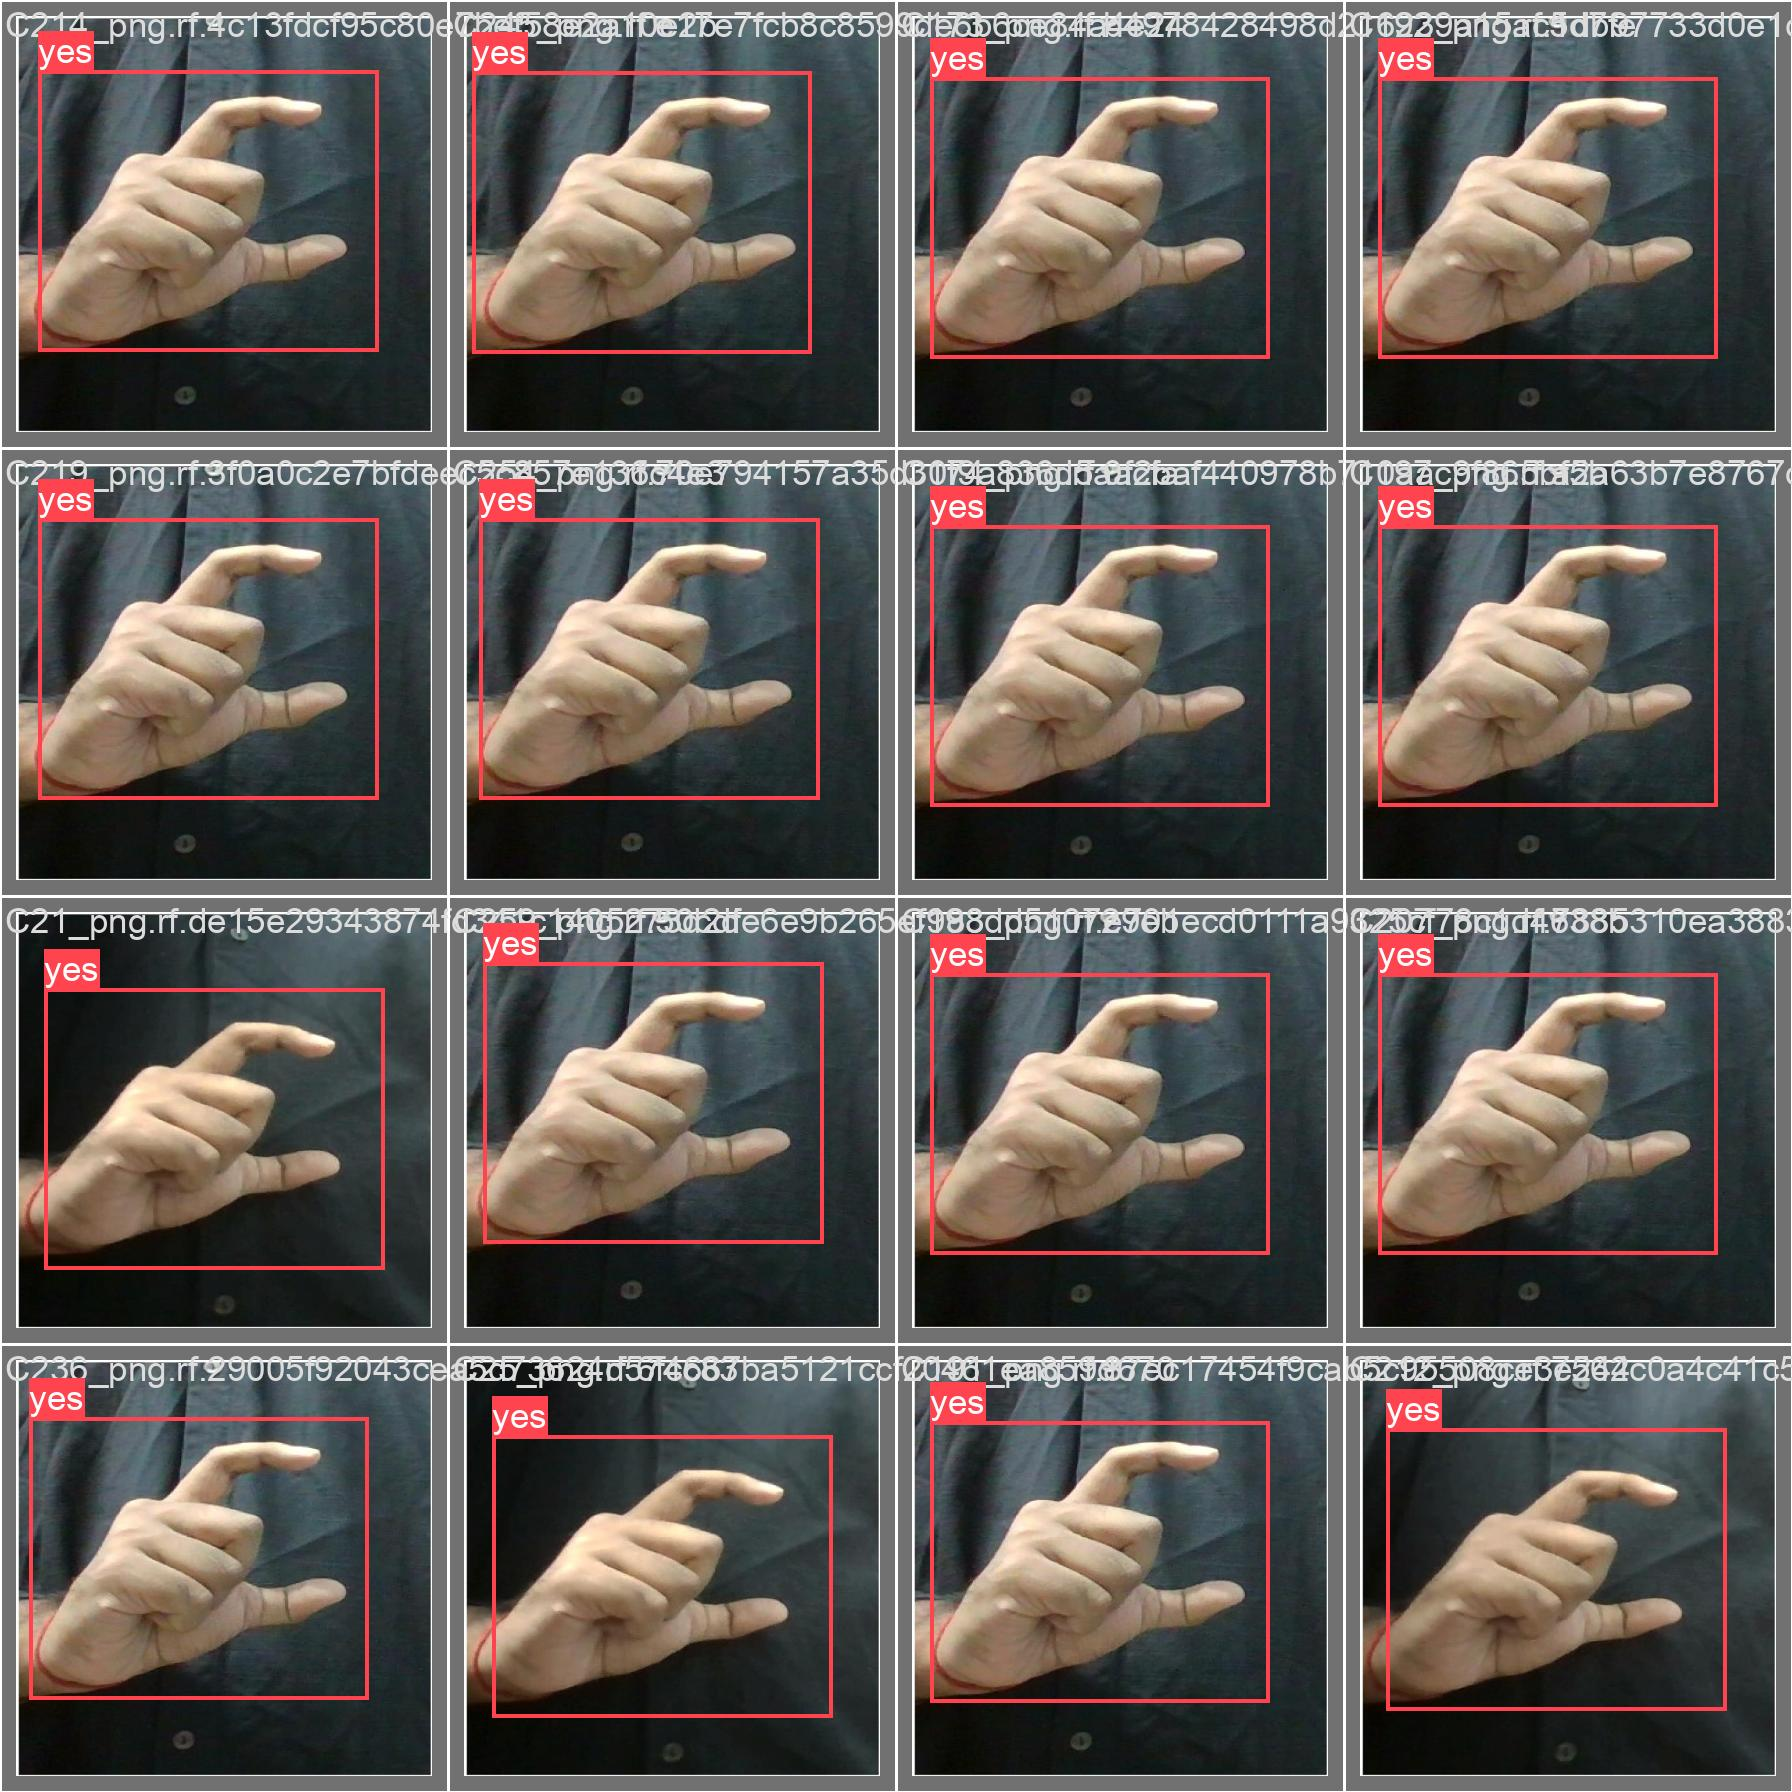

In [17]:
# ---------------------------------------------------------
# Display ground truth labels and mosaic augmentation
# Logged automatically during training
# ---------------------------------------------------------
from IPython.display import Image, display

print("GROUND TRUTH TRAINING DATA:")

# Path to the first validation batch visualization
display(Image(filename="runs/detect/yolov11_sign_language/val_batch0_labels.jpg", width=900))

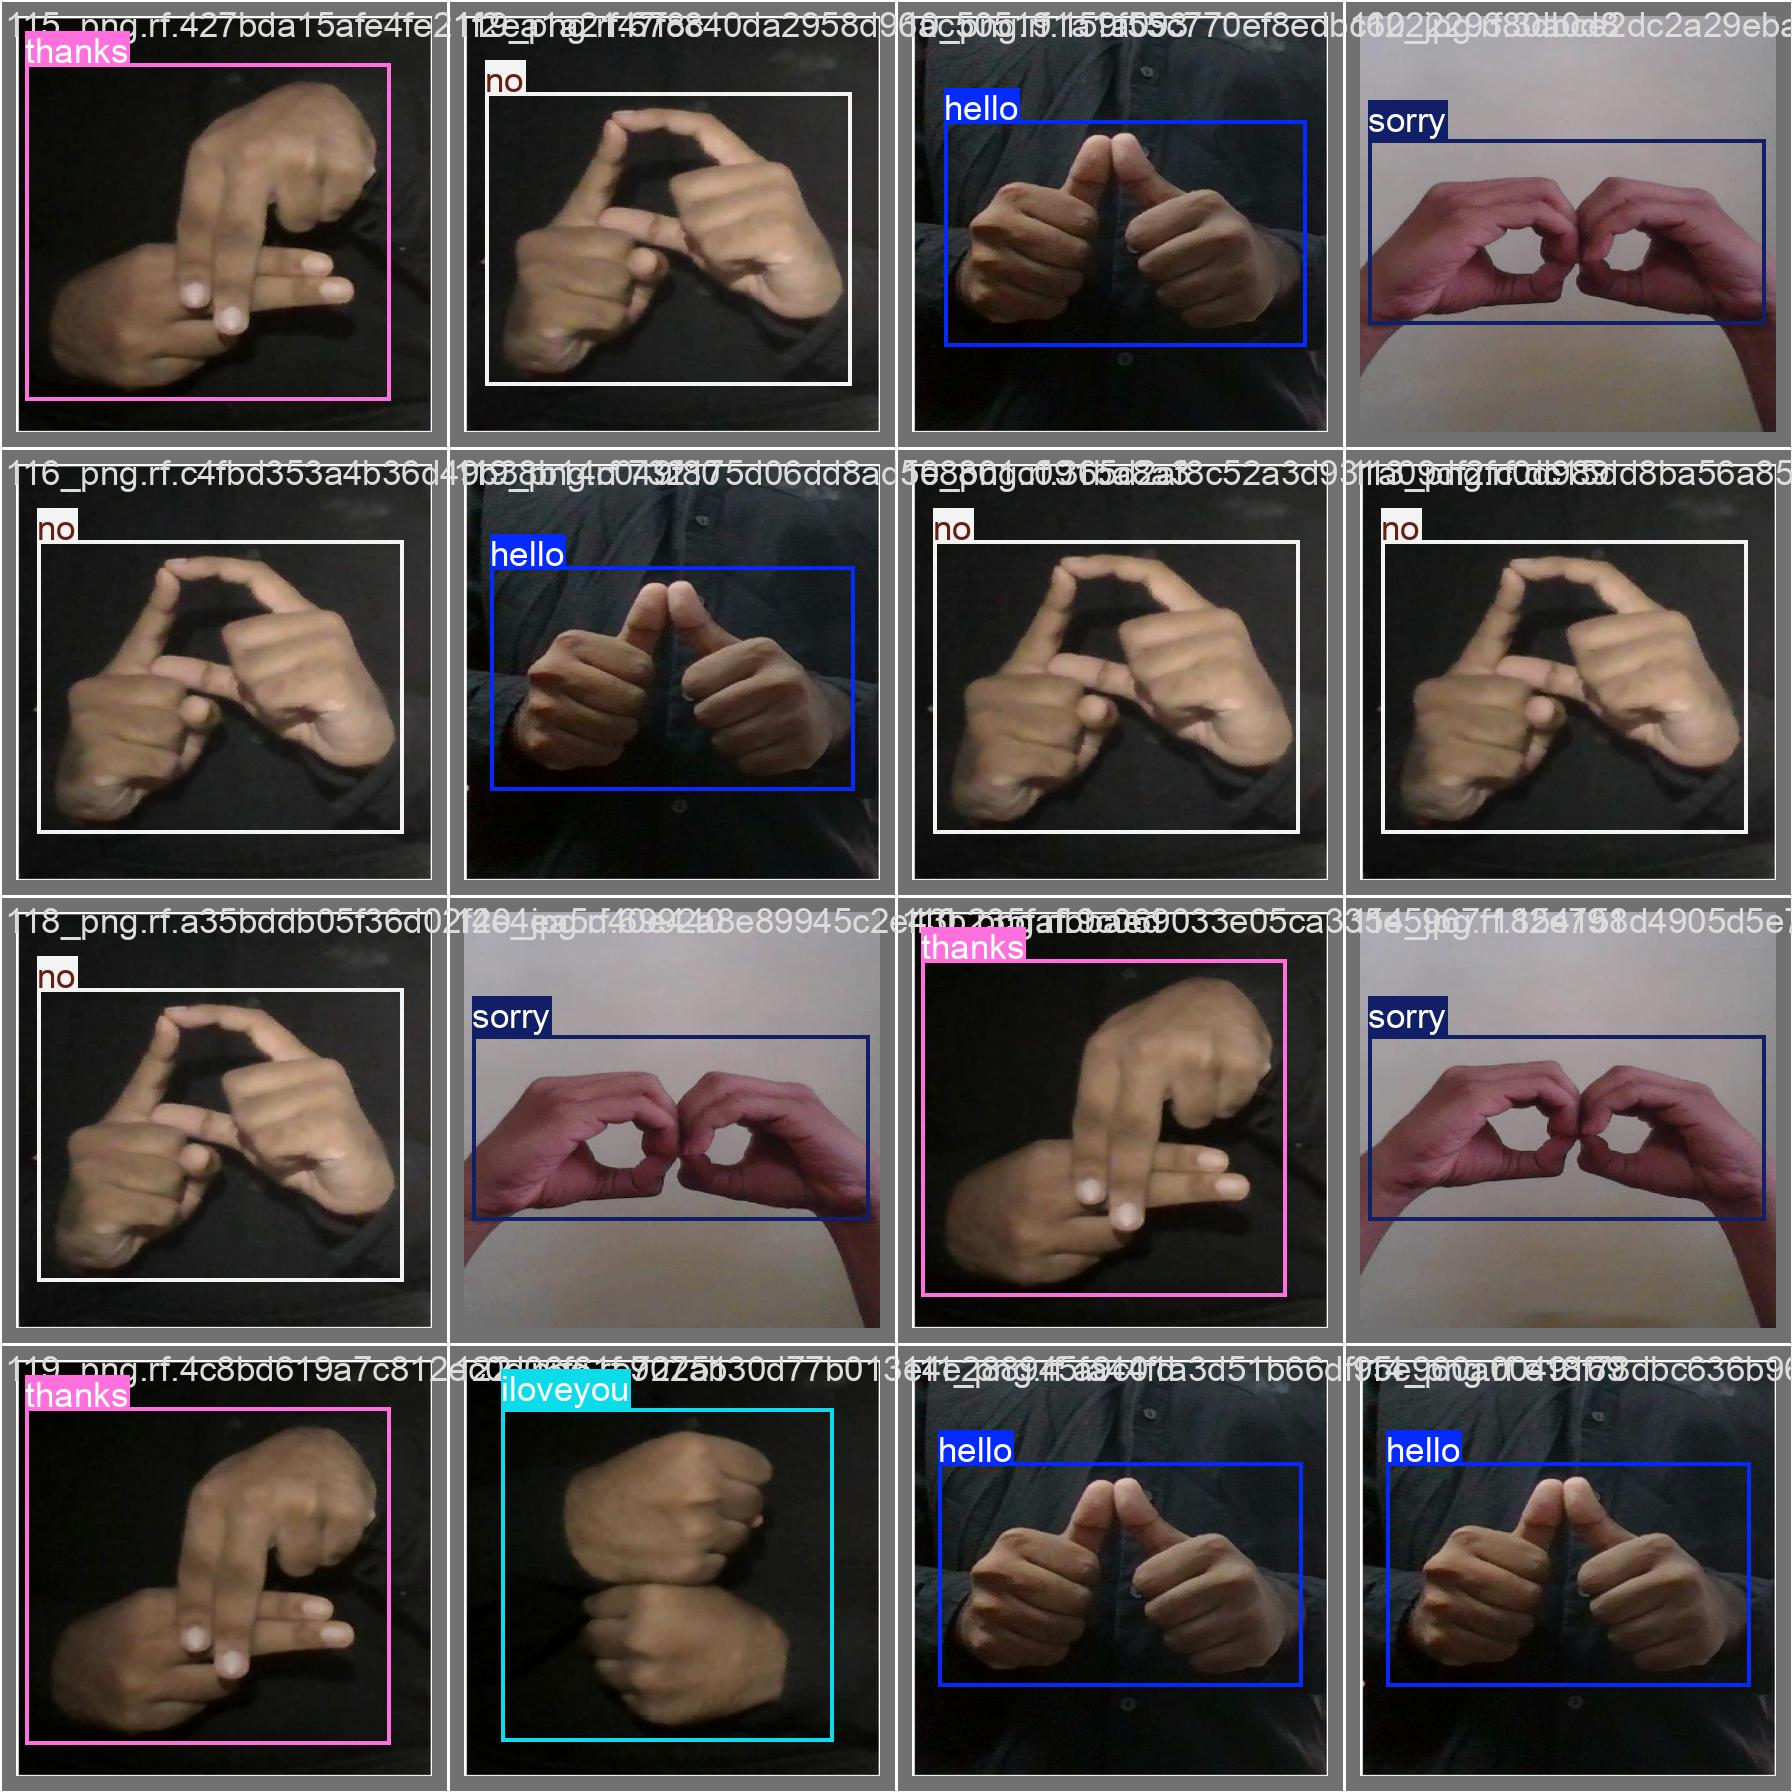

In [18]:
display(Image(filename="runs/detect/yolov11_sign_language/val_batch1_labels.jpg", width=900))

GROUND TRUTH AUGMENTED TRAINING DATA:


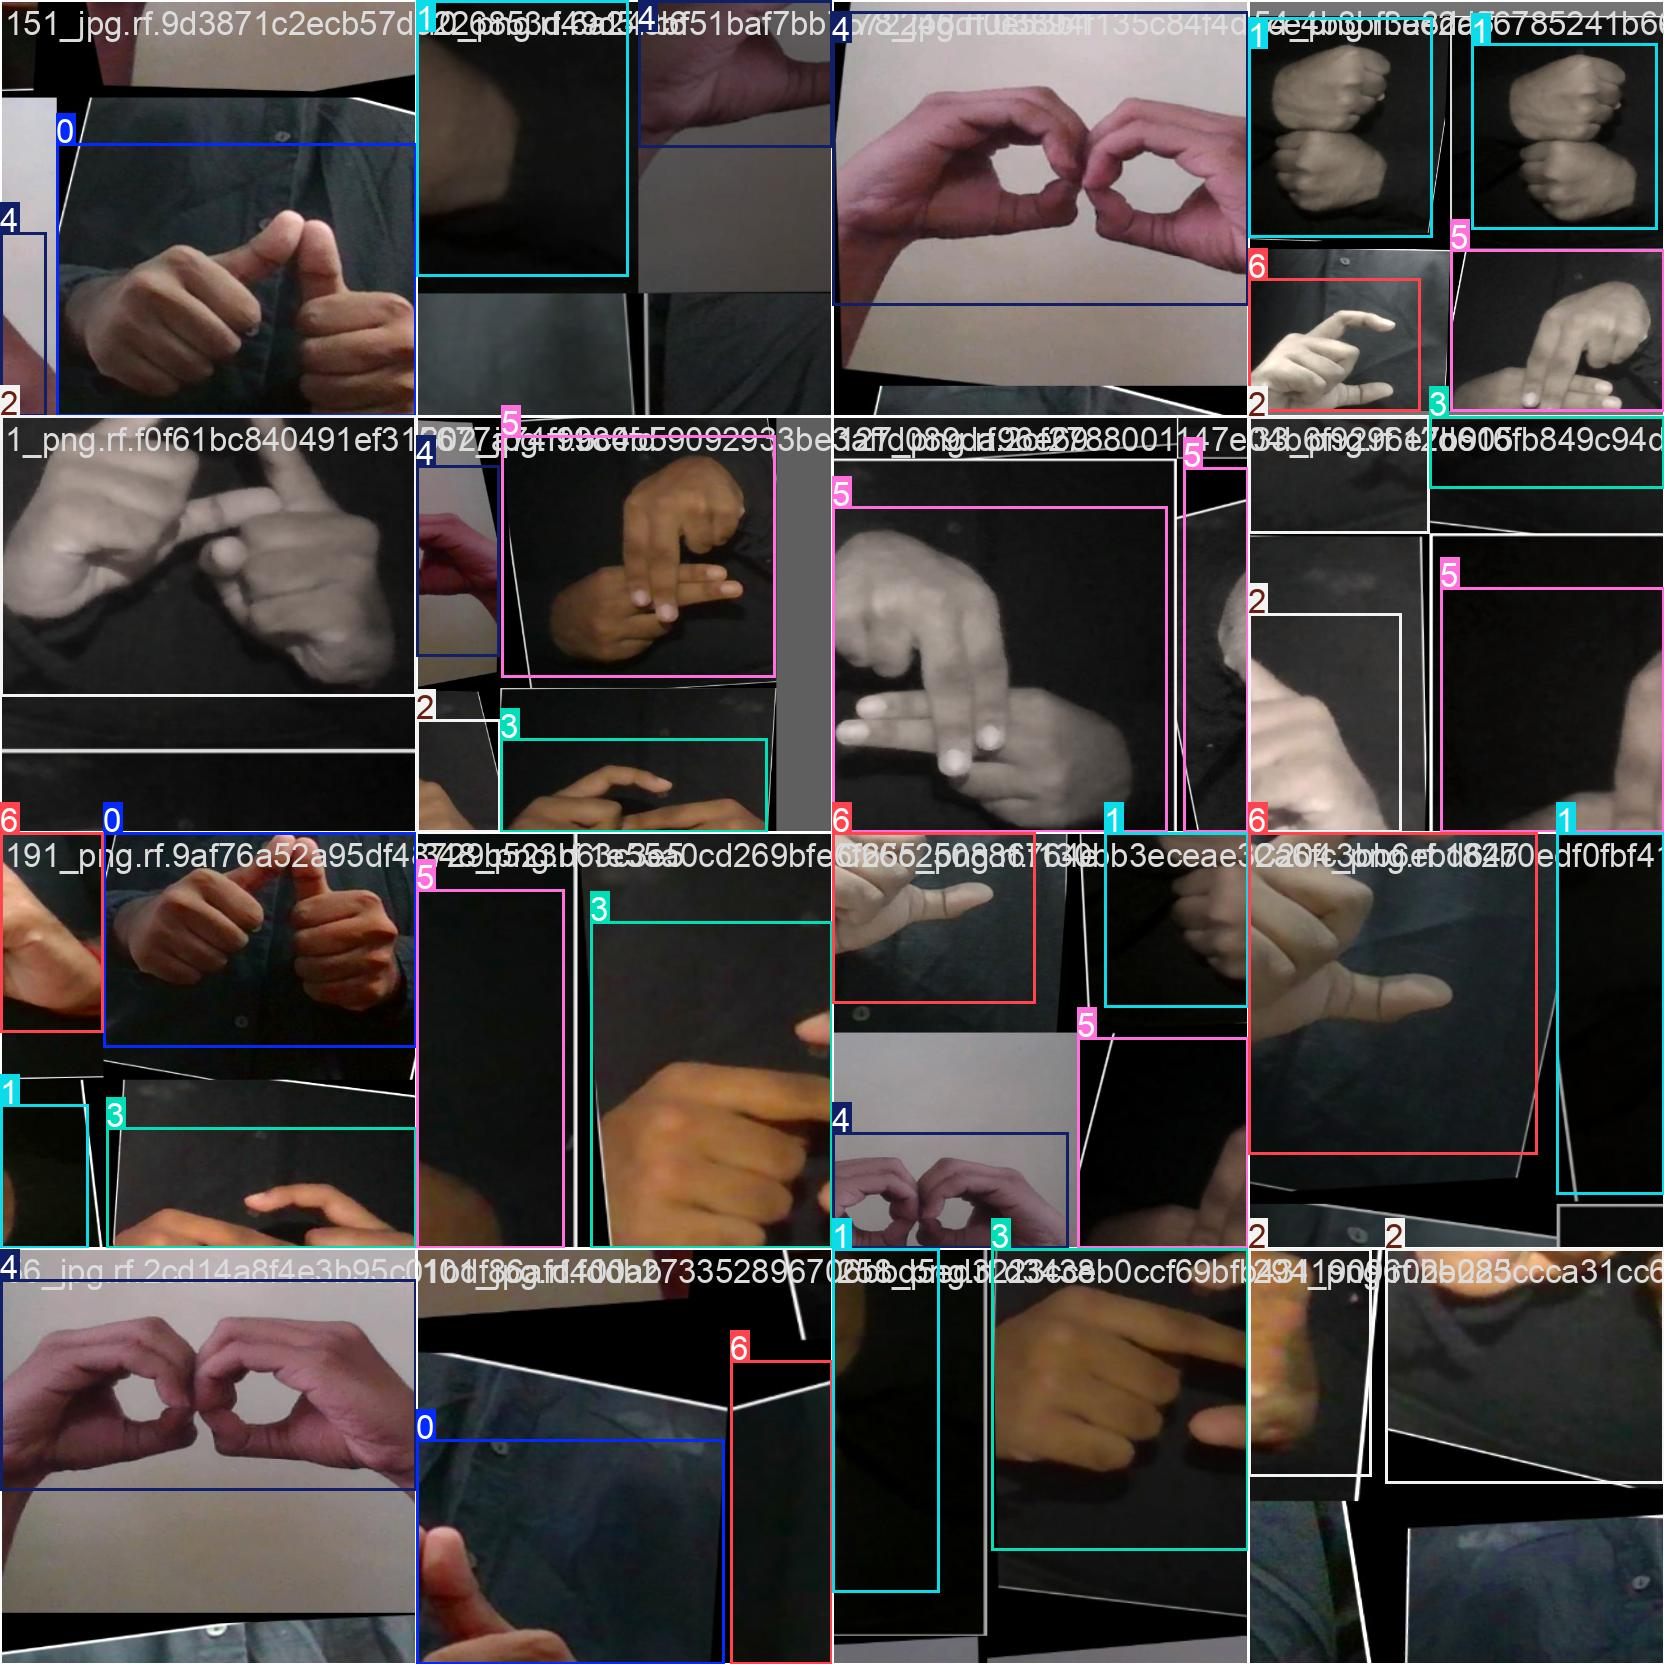

In [19]:
# ---------------------------------------------------------
# Display augmented training batch with mosaic effects
# Logged automatically during YOLOv11 training
# ---------------------------------------------------------
print("GROUND TRUTH AUGMENTED TRAINING DATA:")

# Path to mosaic-augmented training batch visualization
display(Image(filename="runs/detect/yolov11_sign_language/train_batch0.jpg", width=900))


image 1/186 /content/Sign_Language_Images/test/images/101_png.rf.9fe869ef54cc6f1014a40f4109c4fbdd.jpg: 416x416 1 no, 10.3ms
image 2/186 /content/Sign_Language_Images/test/images/102_png.rf.60a749aab6711659e4c03f96bc8fcd18.jpg: 416x416 1 iloveyou, 10.6ms
image 3/186 /content/Sign_Language_Images/test/images/104_png.rf.814096e482ea4e84b9db9a4d52dbe2ea.jpg: 416x416 1 thanks, 12.3ms
image 4/186 /content/Sign_Language_Images/test/images/105_png.rf.8603dce87b9314812e8da51923ffde6d.jpg: 416x416 1 thanks, 10.2ms
image 5/186 /content/Sign_Language_Images/test/images/109_png.rf.307329e53d6e5159bdbdd61bc512164a.jpg: 416x416 1 no, 10.2ms
image 6/186 /content/Sign_Language_Images/test/images/109_png.rf.72efd46e11d6d57eef1a7a40cbc2d655.jpg: 416x416 1 hello, 10.2ms
image 7/186 /content/Sign_Language_Images/test/images/110_jpg.rf.4810e4cc172cdab4486763e4cfaf1e9c.jpg: 416x416 1 sorry, 10.2ms
image 8/186 /content/Sign_Language_Images/test/images/112_png.rf.43b5e41f232457577d6e6f31ae49c213.jpg: 416x416 

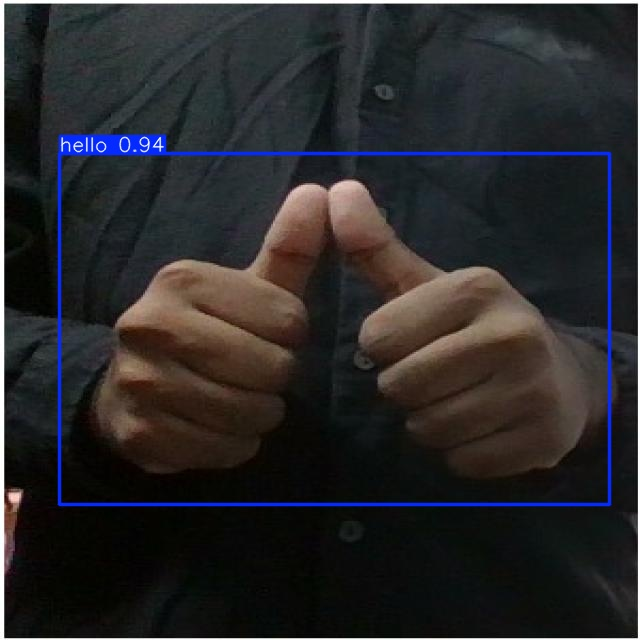

In [20]:
# ---------------------------------------------------------
# Run inference using best trained weights on test images
# Source folder: test/images from Roboflow export
# ---------------------------------------------------------


# Load trained model weights
model   = YOLO("runs/detect/yolov11_sign_language/weights/best.pt")

# Run inference on test image folder
results = model.predict(source="Sign_Language_Images/test/images", conf=0.5, save=True)

# ---------------------------------------------------------
# Display one of the annotated predictions
# ---------------------------------------------------------
# Find one saved prediction image
pred_dir    = "runs/detect/predict"
pred_images = [f for f in os.listdir(pred_dir) if f.endswith(".jpg")]

# Display first prediction image
if pred_images:
    display(Image(filename=os.path.join(pred_dir, pred_images[0]), width=900))
else:
    print("No prediction images found.")

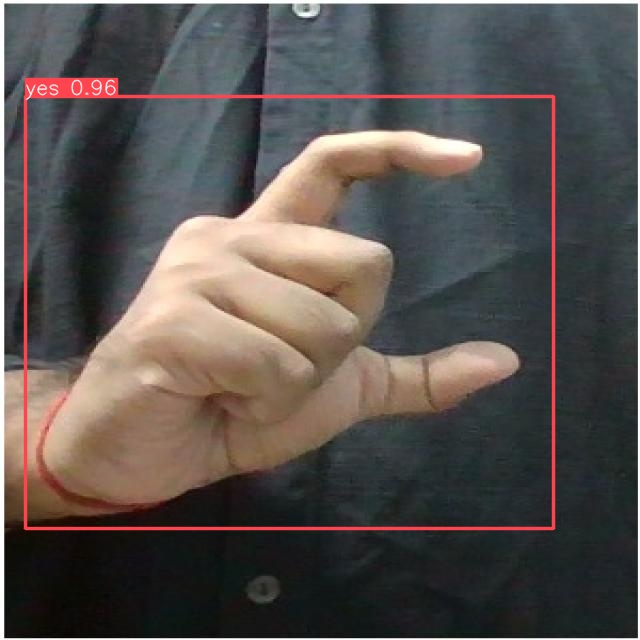

In [21]:
# Display first prediction image
if pred_images:
    display(Image(filename=os.path.join(pred_dir, pred_images[1]), width=900))
else:
    print("No prediction images found.")

# Export Trained Weights for Future Inference

In [28]:
# ---------------------------------------------------------
# Force Mount Google Drive to save trained weights
# ---------------------------------------------------------

from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [29]:
# Check if Drive is accessible
!ls /content/gdrive/MyDrive

 chest_ct_scan_images		  lung_colon_ct_scan_image_set.zip
 chest_ct_scan_images_small.zip  'Menstrual Calendar.gsheet'
 chest_ct_scan_images.zip	  PRT_Upload
'Colab Notebooks'		  Sign_Language_Images.zip
'Google Earth'			  Waste_Detection_Using_YOLO_v5.ipynb


In [30]:
# Copy trained weights to Drive
!cp runs/detect/yolov11_sign_language/weights/best.pt /content/gdrive/MyDrive/yolov11_sign_best.pt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [31]:
drive.flush_and_unmount()

In [32]:
!ls /content/gdrive/MyDrive

ls: cannot access '/content/gdrive/MyDrive': No such file or directory
